In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from BlackScholesBarenblatt100D import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Tanh"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, 1, layers, mode, activation)

n_iter = 2*10**4
lr = 1e-3

In [4]:
model.load_model("models/BlackScholesBarenblatt100DTanh.pth")

In [4]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 5.822e+05, Y0: -0.653, Time: 1.14, Learning Rate: 1.000e-03
It: 100, Loss: 3.998e+03, Y0: 71.438, Time: 37.97, Learning Rate: 1.000e-03
It: 200, Loss: 4.310e+03, Y0: 67.156, Time: 37.01, Learning Rate: 1.000e-03
It: 300, Loss: 2.030e+03, Y0: 69.726, Time: 35.22, Learning Rate: 1.000e-03
It: 400, Loss: 1.328e+03, Y0: 72.478, Time: 33.99, Learning Rate: 1.000e-03
It: 500, Loss: 6.573e+02, Y0: 76.019, Time: 32.96, Learning Rate: 1.000e-03
It: 600, Loss: 4.513e+02, Y0: 76.176, Time: 33.55, Learning Rate: 1.000e-03
It: 700, Loss: 3.414e+02, Y0: 76.575, Time: 33.83, Learning Rate: 1.000e-03
It: 800, Loss: 3.265e+02, Y0: 76.914, Time: 32.90, Learning Rate: 1.000e-03
It: 900, Loss: 2.539e+02, Y0: 76.729, Time: 33.74, Learning Rate: 1.000e-03
It: 1000, Loss: 2.375e+02, Y0: 76.931, Time: 33.95, Learning Rate: 1.000e-03
It: 1100, Loss: 2.877e+02, Y0: 77.222, Time: 33.41, Learning Rate: 1.000e-03
It: 1200, Loss: 1.846e+02, Y0: 76.811, Time: 34.14, Learning Rate: 1.000e-03
It: 1

In [5]:
n_iter = 5*10**3
lr = 1e-5

In [6]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 7.896e+01, Y0: 77.129, Time: 0.84, Learning Rate: 1.000e-05
It: 20000, Loss: 3.189e+01, Y0: 76.488, Time: 23.60, Learning Rate: 1.000e-05
It: 20100, Loss: 3.599e+01, Y0: 76.468, Time: 23.25, Learning Rate: 1.000e-05
It: 20200, Loss: 3.500e+01, Y0: 76.537, Time: 23.48, Learning Rate: 1.000e-05
It: 20300, Loss: 3.604e+01, Y0: 76.549, Time: 23.37, Learning Rate: 1.000e-05
It: 20400, Loss: 3.194e+01, Y0: 76.525, Time: 23.38, Learning Rate: 1.000e-05
It: 20500, Loss: 3.806e+01, Y0: 76.503, Time: 23.51, Learning Rate: 1.000e-05
It: 20600, Loss: 3.223e+01, Y0: 76.438, Time: 23.21, Learning Rate: 1.000e-05
It: 20700, Loss: 3.394e+01, Y0: 76.516, Time: 23.42, Learning Rate: 1.000e-05
It: 20800, Loss: 3.214e+01, Y0: 76.469, Time: 23.13, Learning Rate: 1.000e-05
It: 20900, Loss: 3.380e+01, Y0: 76.504, Time: 23.18, Learning Rate: 1.000e-05
It: 21000, Loss: 3.454e+01, Y0: 76.544, Time: 23.91, Learning Rate: 1.000e-05
It: 21100, Loss: 3.447e+01, Y0: 76.551, Time: 23.14, Learn

In [5]:
def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

In [6]:
graph = model.iteration, model.training_loss

In [7]:
np.random.seed(42)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 5

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

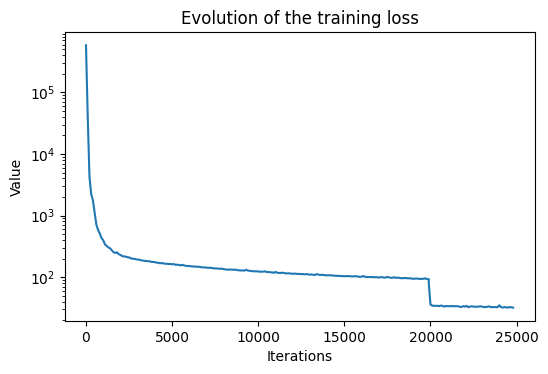

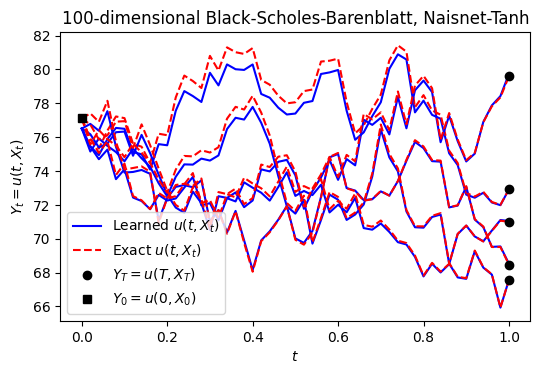

In [9]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig("Figures/BlackScholesBarenblatt100DTanhLoss.pdf")

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig("Figures/BlackScholesBarenblatt100DTanhPreds.pdf")

plt.show()

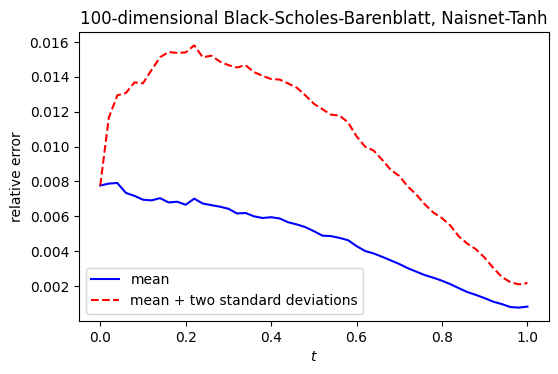

In [10]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)

plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig("Figures/BlackScholesBarenblatt100DTanhErrors.pdf")
plt.show()

In [11]:
model.save_model("models/BlackScholesBarenblatt100DTanh.pth")